# Análisis Descriptivo Exploratorio - Pretest

## Paso 1: Importación de las librerías

In [118]:
##Librerías importantes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

##Preprocesado y análisis
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
##Librerías para over y under sampling
from sklearn.utils import resample

##Librerías de ML
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold
from datetime import datetime

## Funciones

In [80]:
##Test de normalidad de Shapiro-wilk
def testShapiroWilk(df):
        valoresP = []
        concepto = []
        variable = []
        for column in df:
            k2, p_value = stats.shapiro(df[column].values)
            valoresP.append(p_value)
            variable.append(column)
            if (p_value < 0.05):
                concepto.append('No es una variable Normal')
            else:
                concepto.append('Es una variable Normal')
        dfShapiro = pd.DataFrame(
            {'Variable': variable, 'Valores P': valoresP, 'Concepto': concepto})
        return dfShapiro

##Función para gráficar correlaciones
def grafCor(matriz):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
    sns.heatmap(
        matriz,
        annot     = True,
        cbar      = True,
        annot_kws = {"size": 10},
        vmin      = -1,
        vmax      = 1,
        center    = 0,
        cmap      = sns.light_palette("#0d47a1"),
        square    = True,
        ax        = ax,
        linewidth=.5
    )

    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation = 45,
        horizontalalignment = 'right',
    )

    ax.tick_params(labelsize = 10)

##Función renombrar dataframe
def camEncab(df, listaN):
    df.columns = listaN
    return df

##Función para Normalizar
def normaData(df):
    valores = df.values  
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(valores)

    pd.DataFrame(np.vstack((scaler.data_min_, scaler.data_max_)),
             index=['Min', 'Max'],
             columns=df.columns)

    normalizados = scaler.transform(valores)
    df_norm = pd.DataFrame(normalizados,
                       index=df.index,
                       columns=df.columns)
    return df_norm

##Correlacion tidy
def tidy_corr_matrix(corr_mat):
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    return(corr_mat)

## Paso 2: Importar la data

In [3]:
datos = pd.read_csv('./pretest.csv', sep=';')
datosCopy = datos.copy()
datos.head()

,Puntuacion,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,PP5,PP6,PP7,PP8
0,10,3,3,2,1,2,1,1,1,1,1,71,1,3,4
1,8,2,3,2,1,2,1,1,3,1,1,65,2,2,2
2,9,1,3,2,1,2,1,1,1,1,1,52,2,2,2
3,9,3,3,3,1,2,1,1,1,1,1,64,2,3,5
4,8,3,3,3,1,2,1,1,3,1,1,75,1,3,5


## Paso 3: Análisis EDA

In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Puntuacion  29 non-null     int64
 1   P1          29 non-null     int64
 2   P2          29 non-null     int64
 3   P3          29 non-null     int64
 4   P4          29 non-null     int64
 5   P5          29 non-null     int64
 6   P6          29 non-null     int64
 7   P7          29 non-null     int64
 8   P8          29 non-null     int64
 9   P9          29 non-null     int64
 10  P10         29 non-null     int64
 11  PP5         29 non-null     int64
 12  PP6         29 non-null     int64
 13  PP7         29 non-null     int64
 14  PP8         29 non-null     int64
dtypes: int64(15)
memory usage: 3.5 KB


In [5]:
datos.describe().T

,count,mean,std,min,25%,50%,75%,max
Puntuacion,29.0,7.586207,1.547284,3.0,7.0,8.0,9.0,10.0
P1,29.0,2.310345,0.760801,1.0,2.0,2.0,3.0,3.0
P2,29.0,2.862069,0.441114,1.0,3.0,3.0,3.0,3.0
P3,29.0,2.310345,0.470824,2.0,2.0,2.0,3.0,3.0
P4,29.0,1.310345,0.541390,1.0,1.0,1.0,2.0,3.0
P5,29.0,2.000000,0.534522,1.0,2.0,2.0,2.0,3.0
P6,29.0,1.206897,0.559292,1.0,1.0,1.0,1.0,3.0
P7,29.0,1.172414,0.539111,1.0,1.0,1.0,1.0,3.0
P8,29.0,1.689655,0.712313,1.0,1.0,2.0,2.0,3.0
P9,29.0,1.172414,0.468201,1.0,1.0,1.0,1.0,3.0


### 3.1. Dimensión Social

In [6]:
##verificación de sociodemográficos: EDAD PP5
##Rangos: 
# Menores de 60 años
# Entre 60 - 70 años
# Entre 70 - 80 años
# Entre 80 - 90 años

before60 = []
range60_70 = []
range70_80 = []
range80_90 = []

for año in datos.PP5:
  if año < 60:
    before60.append(año)
  elif año < 70:
    range60_70.append(año)
  elif año < 80 :
    range70_80.append(año)
  elif año < 90 :
    range80_90.append(año)


print(f""" 
Menores de 60 años: {round(len(before60)/np.float64(len(datos.PP5)),2)*100}
Entre 60 - 70 años: {round(len(range60_70)/np.float64(len(datos.PP5)),2)*100}
Entre 70 - 80 años: {round(len(range70_80)/np.float64(len(datos.PP5)),2)*100}
Entre 80 - 90 años: {round(len(range80_90)/np.float64(len(datos.PP5)),2)*100}
""")


ages = [len(before60), len(range60_70), len(range70_80), len(range80_90)]
ages = pd.DataFrame(data=ages).T
ages.columns = ['Menores de 60 años', 'Entre 60 - 70 años', 'Entre 70 - 80 años', 'Entre 80 - 90 años']
ages


# La mayoria de las personas registradas cuentan con una edad entre el rango de 60 y 70 años, representando el 38%, 
# el segundo grupo mayoritario son menos de 60 años con una representanción del 31%.
# Finalmente, el 24% de las personas registradas cuentan con una edad en el rango de los 70 y 80 años respecto al total de registros. 

 
Menores de 60 años: 31.0
Entre 60 - 70 años: 38.0
Entre 70 - 80 años: 24.0
Entre 80 - 90 años: 7.000000000000001



,Menores de 60 años,Entre 60 - 70 años,Entre 70 - 80 años,Entre 80 - 90 años
0,9,11,7,2


In [7]:
##verificación de sociodemográficos: GENERO PP6
##Rangos: 

#1: Masculino
#2: Femenino
#3: Otro

round(datos.PP6.value_counts()/np.float64(len(datos)),2)*100

# El 69% son hombres, el 28% son mujeres y otros representan el 3% del total de 29 registros.

1    69.0
2    28.0
3     3.0
Name: PP6, dtype: float64

In [8]:
#verificación de sociodemográficos: ESTRATO PP7
##Rangos: 
#1 a 10 semestre

round(datos.PP7.value_counts()/np.float64(len(datos)),2)*100

# Se evidencia que la mayoria de las personas registradas son de estrato 2 representadas en el 45% del total de 29 registros. 
# El estrato 3 representa el 31% y el estrato 1 representa el 24.

2    45.0
3    31.0
1    24.0
Name: PP7, dtype: float64

In [9]:
#verificación de sociodemográficos: Ultimo nivel de escolaridad PP8
## Rangos: 
# 1. Primaria
# 2. Bachillerato
# 3. Técnico
# 4. Tecnólogo
# 5. Profesional

round(datos.PP8.value_counts()/np.float64(len(datos)),2)*100

# Se evidencia que el ultimo nivel de escolaridad más persistente en las personas registrados es el bachillerato con el 55%, 
# Con nivel de escolaridad profesional representa el 31% y primaria el 7%.  

2    55.0
5    31.0
1     7.0
4     3.0
3     3.0
Name: PP8, dtype: float64

In [10]:
# Validando sociodemográficas agrupando genero, edad, estrato
dataCopy = datos.copy()
dataCopy.PP6 = np.where(dataCopy.PP6 == 1, 'Masculino', np.where(dataCopy.PP6 == 2, 'Femenino', 'Otros'))

In [11]:
##Cruzando las tres variables sociodemográficas:
##la mayor distribución femenina se encuentra en el estrato 2
##la menor distribución femenina se encuentra en el estrato 3
##En cuanto a los hombres la mayor distribución se encuentra en el estrato 3
pd.crosstab(dataCopy.PP6, dataCopy.PP7, margins=True, margins_name="Total")

PP7,1,2,3,Total
PP6,,,,
Femenino,2,5,1,8
Masculino,5,7,8,20
Otros,0,1,0,1
Total,7,13,9,29


In [12]:
##Cruzando las tres variables sociodemográficas:
#Rangos:
#1. Primaria
#2. Bachillerato
#3. Técnico
#4. Tecnólogo
#5. Profesional

## El nivel de escolaridad de bachillerato es la mayor distribución tanto femenina como masculina
## En cuanto a la menor distribución de nivel de escolaridad en mujeres es Primaria y Profesional, 
## mientras que en hombres la menor distribucion se encuentra en primaria, técnico y tecnólogo

pd.crosstab(dataCopy.PP6, dataCopy.PP8, margins=True, margins_name="Total")

PP8,1,2,3,4,5,Total
PP6,,,,,,
Femenino,1,6,0,0,1,8
Masculino,1,10,1,1,7,20
Otros,0,0,0,0,1,1
Total,2,16,1,1,9,29


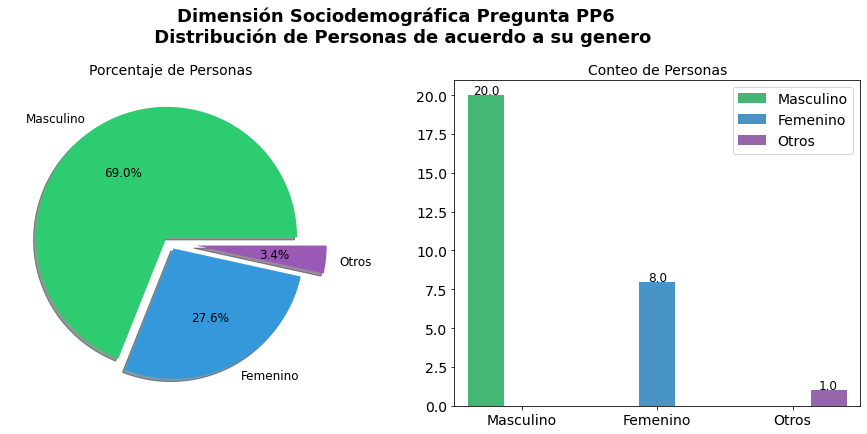

In [13]:
##La población esta delimitada por 69% de personas de género masculino, 27.6% de género femenino y 3.4% otros.

def graficaDos(dim,column1, texto1, texto2, explode, preguntaC, tam1, tam2, letraTit, LetraAx, letraFig):
    f, ax = plt.subplots(1,2, figsize=(tam1,tam2))
    f.suptitle('Dimensión {} Pregunta {} \n {}'.format(dim,column1, preguntaC), x= 0.5, y =1.05, fontsize=letraFig, weight='bold')
    
    ##Grafica Matplotlib
    dataCopy[column1].value_counts().plot.pie( autopct='%1.1f%%', ax=ax[0], 
                                             shadow=True, labels= ['Masculino', 'Femenino', 'Otros'], 
                                             explode= explode, fontsize=12, 
                                             colors=['#2ECC71','#3498DB', '#9B59B6'])
    ax[0].set_title(texto1, fontsize=letraTit)
    ax[0].set_xlabel('', fontsize=LetraAx)
    ax[0].set_ylabel('', fontsize=LetraAx)
    
    ##Grafica seaborn
    plot = sns.countplot(column1, hue=column1, data=dataCopy, ax=ax[1], palette=['#2ECC71','#3498DB', '#9B59B6'])
    for i in plot.patches:
        plot.annotate(i.get_height(),
                      (i.get_x() + i.get_width()/2, i.get_height()),
                      ha='center', va='baseline', fontsize=12, 
                     color='black', xytext=(0,1),
                     textcoords='offset points')
    ax[1].set_title(texto2,fontsize=letraTit)
    ax[1].set_xlabel('', fontsize=LetraAx)
    ax[1].set_ylabel('', fontsize=LetraAx)
    ax[1].tick_params(labelsize=letraTit)
    
    plt.legend(labels = ['Masculino', 'Femenino', 'Otros'], fontsize=letraTit)
    plt.show() 
    

graficaDos('Sociodemográfica','PP6', 'Porcentaje de Personas','Conteo de Personas', (0.05, 0.05, 0.2),'Distribución de Personas de acuerdo a su genero', 16,6,14,12,18)

In [14]:
# El estrato 2 es donde más registros por parte de la persona cuenta, seguido por el estrato 3 

dataCopy.PP7.value_counts()

2    13
3     9
1     7
Name: PP7, dtype: int64

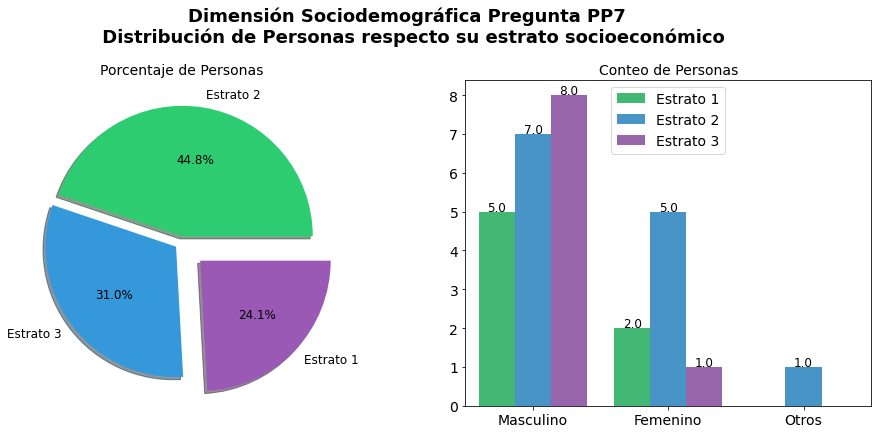

In [15]:
def graficaDos(dim,column1,column2, texto1, texto2, explode, preguntaC, tam1, tam2, letraTit, LetraAx, letraFig):
    f, ax = plt.subplots(1,2, figsize=(tam1,tam2))
    f.suptitle('Dimensión {} Pregunta {} \n {}'.format(dim,column2, preguntaC), x= 0.5, y =1.05, fontsize=letraFig, weight='bold')
    
    ##Grafica Matplotlib
    dataCopy[column2].value_counts().plot.pie( autopct='%1.1f%%', ax=ax[0], 
                                             shadow=True, labels=['Estrato 2','Estrato 3','Estrato 1'], 
                                             explode= explode, fontsize=12, 
                                             colors=['#2ECC71','#3498DB', '#9B59B6','#E67E22', '#F1C40F'])
    ax[0].set_title(texto1, fontsize=letraTit)
    ax[0].set_xlabel('', fontsize=LetraAx)
    ax[0].set_ylabel('', fontsize=LetraAx)
    
    ##Grafica seaborn
    plot = sns.countplot(column1, hue=column2, data=dataCopy, ax=ax[1], palette=['#2ECC71','#3498DB', '#9B59B6','#E67E22', '#F1C40F'])
    for i in plot.patches:
        plot.annotate(i.get_height(),
                      (i.get_x() + i.get_width()/2, i.get_height()),
                      ha='center', va='baseline', fontsize=12, 
                     color='black', xytext=(0,1),
                     textcoords='offset points')
    ax[1].set_title(texto2,fontsize=letraTit)
    ax[1].set_xlabel('', fontsize=LetraAx)
    ax[1].set_ylabel('', fontsize=LetraAx)
    ax[1].tick_params(labelsize=letraTit)
    
    plt.legend(labels = ['Estrato 1','Estrato 2','Estrato 3','Estrato 4','Estrato 5'], fontsize=letraTit)
    plt.show() 
    

graficaDos('Sociodemográfica','PP6','PP7', 'Porcentaje de Personas','Conteo de Personas', (0.05, 0.05, 0.2),'Distribución de Personas respecto su estrato socioeconómico', 16,6,14,12,18)

# La mayoria de personas estan en el estrato 1 representado con el 44.8%, mientras que el estrato 3 es el del menor participación que se tiene registro con una representación del 24.1% 

In [16]:
dataCopy.PP8 = np.where(dataCopy.PP8 == 1, 'Primaria', np.where(dataCopy.PP8 == 2, 'Bachillerato', np.where(dataCopy.PP8 == 3, 'Técnico', np.where(dataCopy.PP8 == 4, 'Tecnólogo', 'Profesional'))))

In [17]:
dataCopy.PP8.value_counts()

Bachillerato    16
Profesional      9
Primaria         2
Tecnólogo        1
Técnico          1
Name: PP8, dtype: int64

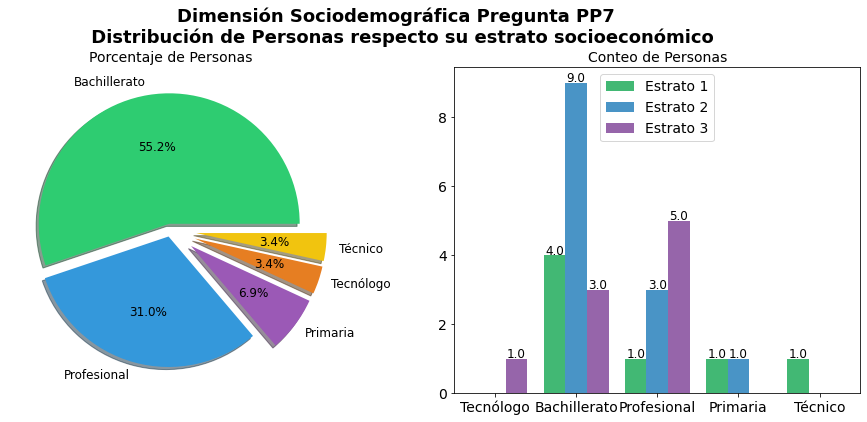

In [18]:
def graficaDos(dim,column1,column2, texto1, texto2, explode, preguntaC, tam1, tam2, letraTit, LetraAx, letraFig):
    f, ax = plt.subplots(1,2, figsize=(tam1,tam2))
    f.suptitle('Dimensión {} Pregunta {} \n {}'.format(dim,column2, preguntaC), x= 0.5, y =1.02, fontsize=letraFig, weight='bold')
    
    ##Grafica Matplotlib
    dataCopy[column1].value_counts().plot.pie( autopct='%1.1f%%', ax=ax[0], 
                                             shadow=True, labels=['Bachillerato', 'Profesional','Primaria','Tecnólogo', 'Técnico'], 
                                             explode= explode, fontsize=12, 
                                             colors=['#2ECC71','#3498DB', '#9B59B6','#E67E22', '#F1C40F'])
    ax[0].set_title(texto1, fontsize=letraTit)
    ax[0].set_xlabel('', fontsize=LetraAx)
    ax[0].set_ylabel('', fontsize=LetraAx)

    
    ##Grafica seaborn
    plot = sns.countplot(column1, hue=column2, data=dataCopy, ax=ax[1], palette=['#2ECC71','#3498DB', '#9B59B6','#E67E22', '#F1C40F'])
    for i in plot.patches:
        plot.annotate(i.get_height(),
                      (i.get_x() + i.get_width()/2, i.get_height()),
                      ha='center', va='baseline', fontsize=12, 
                     color='black', xytext=(0,1),
                     textcoords='offset points')
    ax[1].set_title(texto2,fontsize=letraTit)
    ax[1].set_xlabel('', fontsize=LetraAx)
    ax[1].set_ylabel('', fontsize=LetraAx)
    ax[1].tick_params(labelsize=letraTit)
    
    plt.legend(labels = ['Estrato 1','Estrato 2','Estrato 3','Estrato 4','Estrato 5'], fontsize=letraTit)
    plt.show() 


graficaDos('Sociodemográfica','PP8','PP7', 'Porcentaje de Personas','Conteo de Personas', (0.05, 0.05, 0.2,0.2,0.2),'Distribución de Personas respecto su estrato socioeconómico', 16,6,14,12,18)

# Se puede evidenciar que el nivel de escolaridad predominante es el bachillerato representando el 55.2% del total.

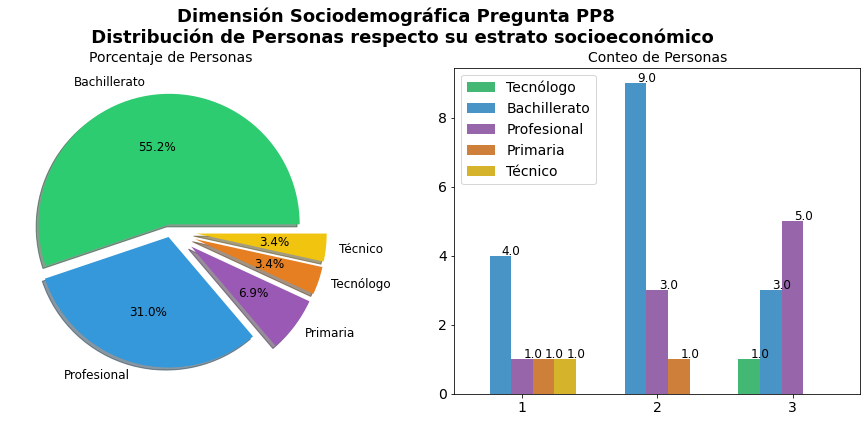

In [19]:
def graficaDos(dim,column1,column2, texto1, texto2, explode, preguntaC, tam1, tam2, letraTit, LetraAx, letraFig):
    f, ax = plt.subplots(1,2, figsize=(tam1,tam2))
    f.suptitle('Dimensión {} Pregunta {} \n {}'.format(dim,column2, preguntaC), x= 0.5, y =1.02, fontsize=letraFig, weight='bold')
    
    ##Grafica Matplotlib
    dataCopy[column2].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], 
                                             shadow=True, labels=['Bachillerato', 'Profesional','Primaria','Tecnólogo', 'Técnico'], 
                                             explode= explode, fontsize=12, 
                                             colors=['#2ECC71','#3498DB', '#9B59B6','#E67E22','#F1C40F'])
    ax[0].set_title(texto1, fontsize=letraTit)
    ax[0].set_xlabel('', fontsize=LetraAx)
    ax[0].set_ylabel('', fontsize=LetraAx)
    
    ##Grafica seaborn
    plot = sns.countplot(column1, hue=column2, data=dataCopy, ax=ax[1], palette=['#2ECC71','#3498DB', '#9B59B6','#E67E22','#F1C40F'])
    for i in plot.patches:
        plot.annotate(i.get_height(),
                      (i.get_x() + i.get_width()/1, i.get_height()),
                      ha='center', va='baseline', fontsize=12, 
                     color='black', xytext=(0,1),
                     textcoords='offset points')
    ax[1].set_title(texto2,fontsize=letraTit)
    ax[1].set_xlabel('', fontsize=LetraAx)
    ax[1].set_ylabel('', fontsize=LetraAx)
    ax[1].tick_params(labelsize=letraTit)
    
    plt.legend(labels = ['Tecnólogo', 'Bachillerato', 'Profesional', 'Primaria','Técnico'], fontsize=letraTit)
    plt.show() 
    

graficaDos('Sociodemográfica','PP7','PP8', 'Porcentaje de Personas','Conteo de Personas', (0.05, 0.05, 0.2,0.2,0.2),'Distribución de Personas respecto su estrato socioeconómico', 16,6,14,12,18)

# Se evidencia que a mayor estrato aumenta la cantidad de personas con educación profesional. Mientras que el técnico y tecnólogo solo representan
# el 6.8, siento la menor representación

### 3.2. Pre-test

In [20]:
dataCopy.PP5 = np.where(dataCopy.PP5 < 60, 'Menos de 60 años', np.where(dataCopy.PP5 < 70, '60 - 70 años', np.where(dataCopy.PP5 < 80, '70 - 80 años', np.where(dataCopy.PP5 < 90, '80 - 90 años', 'Mayores de 90'))))

In [21]:
dataCopy.PP5.value_counts()
# La mayoria de personas que se registraron entran entre la edad de 60 a 70 años.

60 - 70 años        11
Menos de 60 años     9
70 - 80 años         7
80 - 90 años         2
Name: PP5, dtype: int64

In [22]:
def drawChartGeneric(column1, column2, texto1, texto2, explode, preguntaC, tam1, tam2, letraTit, LetraAx, letraFig, labels, options):
    f, ax = plt.subplots(figsize=(tam1,tam2))
    f.suptitle('Pretest - Pregunta {} respecto a {}  \n {}'.format(column1, column2, preguntaC), x= 0.5, y =1.05, fontsize=letraFig, weight='bold')
  
    plot = sns.countplot(column1, hue=column2, data=dataCopy, palette=['#2ECC71','#3498DB', '#9B59B6','#E67E22', '#F1C40F'])
    for i in plot.patches:
        plot.annotate(i.get_height(),
                      (i.get_x() + i.get_width()/2, i.get_height()),
                      ha='center', va='baseline', fontsize=12, 
                     color='black', xytext=(0,1),
                     textcoords='offset points')
    ax.set_title(texto2,fontsize=letraTit)
    ax.set_xlabel('', fontsize=LetraAx)
    ax.set_ylabel('', fontsize=LetraAx)
    ax.set_xticklabels([options[0], options[1], options[2]])
    ax.tick_params(labelsize=letraTit)
    
    plt.legend(labels = [labels[0], labels[1], labels[2]], fontsize=letraTit)
    plt.show() 


def drawChartGenericEstrato(column1, column2, texto1, texto2, explode, preguntaC, tam1, tam2, letraTit, LetraAx, letraFig, options):
    f, axes = plt.subplots(figsize=(tam1,tam2))
    f.suptitle('Pretest - Pregunta {} respecto a {}  \n {}'.format(column1, column2, preguntaC), x= 0.5, y =1.05, fontsize=letraFig, weight='bold')
  
    plot = sns.countplot(column1, hue=column2, data=dataCopy, palette=['#2ECC71','#3498DB', '#9B59B6','#E67E22','#F1C40F'])
    for i in plot.patches:
        plot.annotate(i.get_height(),
                      (i.get_x() + i.get_width()/1, i.get_height()),
                      ha='center', va='baseline', fontsize=12, 
                      color='black', xytext=(0,1),
                      textcoords='offset points')
    axes.set_title(texto2, fontsize=16)
    axes.set_xlabel('', fontsize=12)
    axes.set_ylabel('', fontsize=12)
    axes.set_xticklabels([options[0], options[1], options[2]])
    axes.tick_params(labelsize=16)

    plt.legend(fontsize=16)
    plt.show() 

def drawChartGenericAge(column1, column2, texto1, texto2, explode, preguntaC, tam1, tam2, letraTit, LetraAx, letraFig, options):
    f, axes = plt.subplots(figsize=(tam1,tam2))
    f.suptitle('Pretest - Pregunta {} respecto a {}  \n {}'.format(column1, column2, preguntaC), x= 0.5, y =1.05, fontsize=letraFig, weight='bold')
  
    plot = sns.countplot(column1, hue=column2, data=dataCopy, palette=['#2ECC71','#3498DB', '#9B59B6','#E67E22','#F1C40F'])
    for i in plot.patches:
        plot.annotate(i.get_height(),
                      (i.get_x() + i.get_width()/1, i.get_height()),
                      ha='center', va='baseline', fontsize=12, 
                      color='black', xytext=(0,1),
                      textcoords='offset points')
    axes.set_title(texto2, fontsize=16)
    axes.set_xlabel('', fontsize=12)
    axes.set_ylabel('', fontsize=12)
    axes.set_xticklabels([options[0], options[1], options[2], options[3]])
    axes.tick_params(labelsize=16)

    plt.legend(loc='best', fontsize=16)
    plt.show() 

#### P1. La Informática es:
Opciones:
1. Ciencia que estudia el uso de internet
2. Ciencia que estudia el
funcionamiento del computador
3. Ciencia que estudia la
gestión de información con
medios electrónicos (***Opción correcta***)

In [23]:
pd.crosstab(dataCopy.P1, dataCopy.PP8, margins=True, margins_name="Total")

PP8,Bachillerato,Primaria,Profesional,Tecnólogo,Técnico,Total
P1,,,,,,
1,2,2,0,0,1,5
2,7,0,3,0,0,10
3,7,0,6,1,0,14
Total,16,2,9,1,1,29


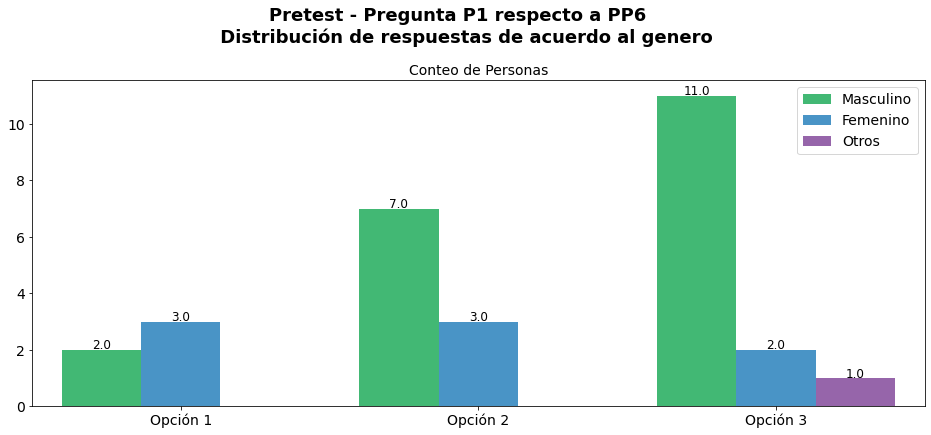

In [24]:
drawChartGeneric('P1','PP6', 'Porcentaje de Personas','Conteo de Personas', (0.05, 0.05, 0.2),
                 'Distribución de respuestas de acuerdo al genero', 16,6,14,12,18, 
                 labels= ['Masculino','Femenino','Otros'], options=['Opción 1', 'Opción 2', 'Opción 3'])

# Se evidencia que fueron mas las personas que fallaron en esta pregunta que las personas que contestaron bien.
# Siendo las mujeres las que en mayor proporción fallaron en comparación a los hombre.

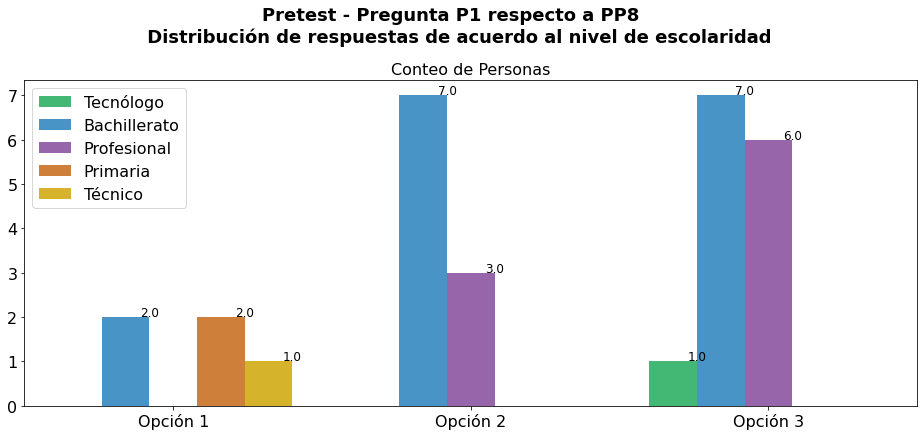

In [25]:
drawChartGenericEstrato('P1', 'PP8', 'Porcentaje de Personas', 'Conteo de Personas', 
                        (0.5, 0.5, 0.5), 'Distribución de respuestas de acuerdo al nivel de escolaridad', 
                        16, 6, 14, 12, 18, options=['Opción 1', 'Opción 2', 'Opción 3'])

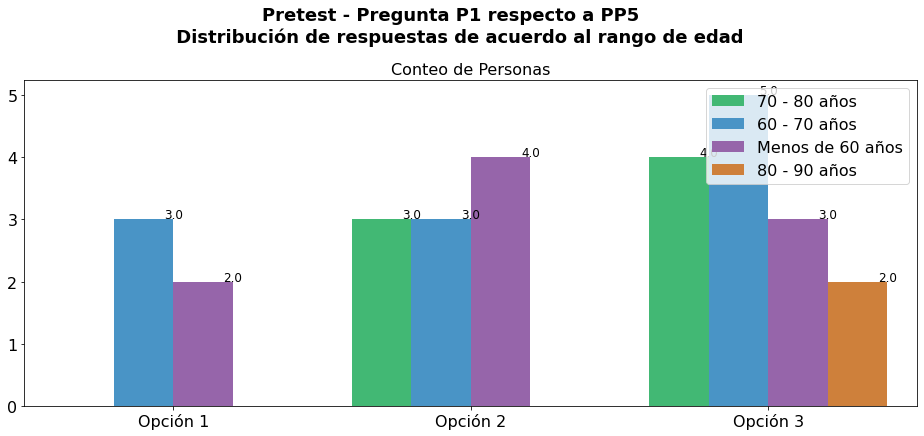

In [26]:
drawChartGenericEstrato('P1', 'PP5', 'Porcentaje de Personas', 'Conteo de Personas', 
                        (0.5, 0.5, 0.5), 'Distribución de respuestas de acuerdo al rango de edad', 
                        16, 6, 14, 12, 18, options=['Opción 1', 'Opción 2', 'Opción 3'])

#### P2. ¿Qué es el software?
Opciones
1. Parte física de la computadora.
2. Parte tangible de la computadora.
3. Conjunto de programas de la computadora (***Opción correcta***)

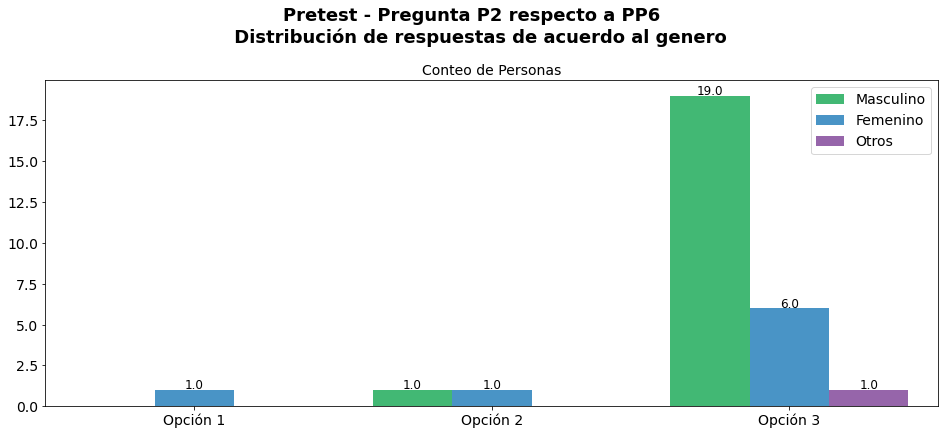

In [27]:
drawChartGeneric('P2','PP6', 'Porcentaje de Personas','Conteo de Personas', (0.05, 0.05, 0.2), 
                 'Distribución de respuestas de acuerdo al genero', 16,6,14,12,18, 
                 labels= ['Masculino','Femenino','Otros'], options=['Opción 1', 'Opción 2', 'Opción 3'])


# Se evidencia que la mayoria de las personas contestaron de forma correcta la pregunta.

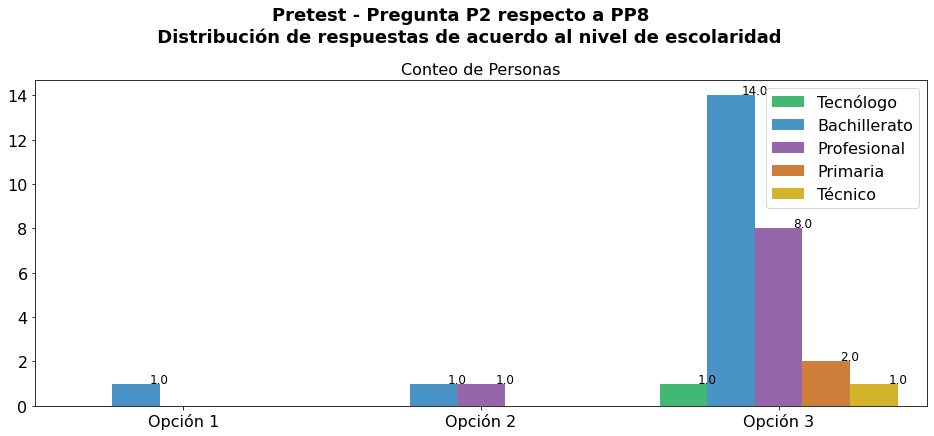

In [28]:
drawChartGenericEstrato('P2', 'PP8', 'Porcentaje de Personas', 'Conteo de Personas', 
                        (0.5, 0.5, 0.5), 'Distribución de respuestas de acuerdo al nivel de escolaridad', 
                        16, 6, 14, 12, 18, options=['Opción 1', 'Opción 2', 'Opción 3'])

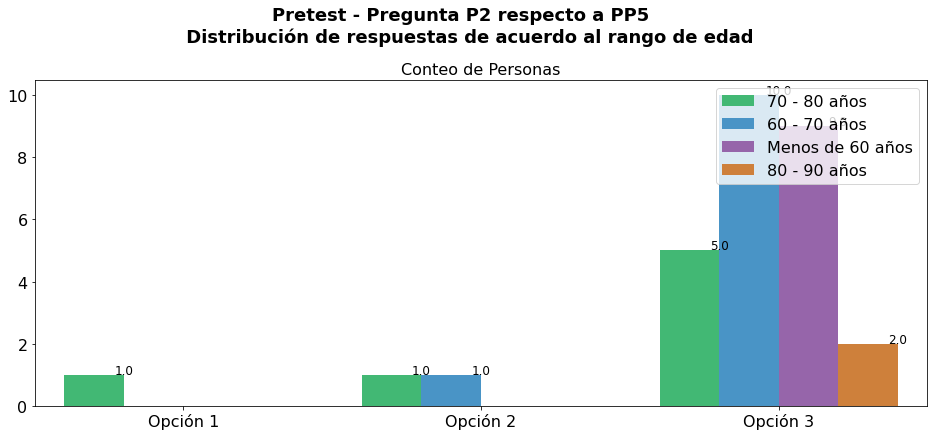

In [29]:
drawChartGenericEstrato('P2', 'PP5', 'Porcentaje de Personas', 'Conteo de Personas', 
                        (0.5, 0.5, 0.5), 'Distribución de respuestas de acuerdo al rango de edad', 
                        16, 6, 14, 12, 18, options=['Opción 1', 'Opción 2', 'Opción 3'])


#### P3. Los partes de una computador son:
Opciones
1. Monitor y CPU.
2. Pantalla, Torre o CPU, Teclado y Mouse. (***Opción correcta***)
3. Hardware y Software.

#### P4. ¿Qué es el sistema operativo?
Opciones
1. Programas que coordinan y controlan el funcionamiento del computador. (***Opción correcta***)
2. Programa que controla el impresor.
3. Conjunto de partes que componen la computadora.

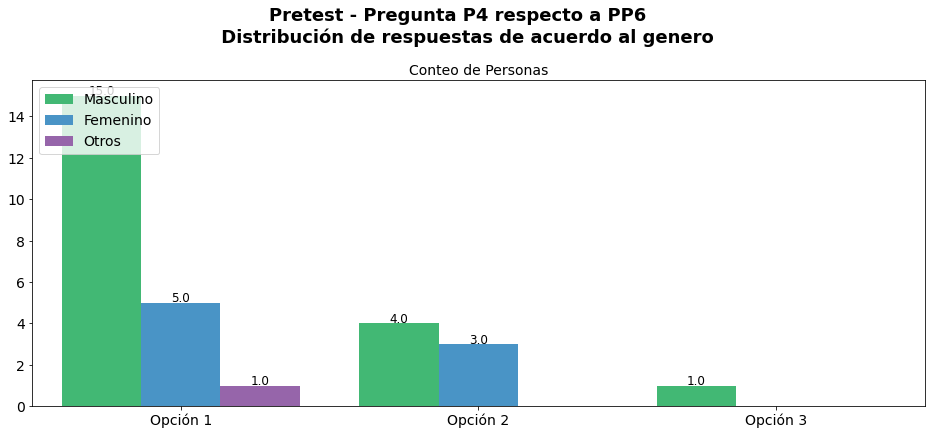

In [30]:
drawChartGeneric('P4','PP6', 'Porcentaje de Personas','Conteo de Personas', (0.05, 0.05, 0.2),
                 'Distribución de respuestas de acuerdo al genero', 16,6,14,12,18, labels= ['Masculino','Femenino','Otros'],
                 options=['Opción 1', 'Opción 2', 'Opción 3'])

# Se evidencia que en la presente pregunta no se presentaron dificultades de parte de los encuestados. Más de la mitad lograron contestar de forma correcta, sin embargo, existe un numero considerable de mujeres que fallaron en comparación a los hombres.

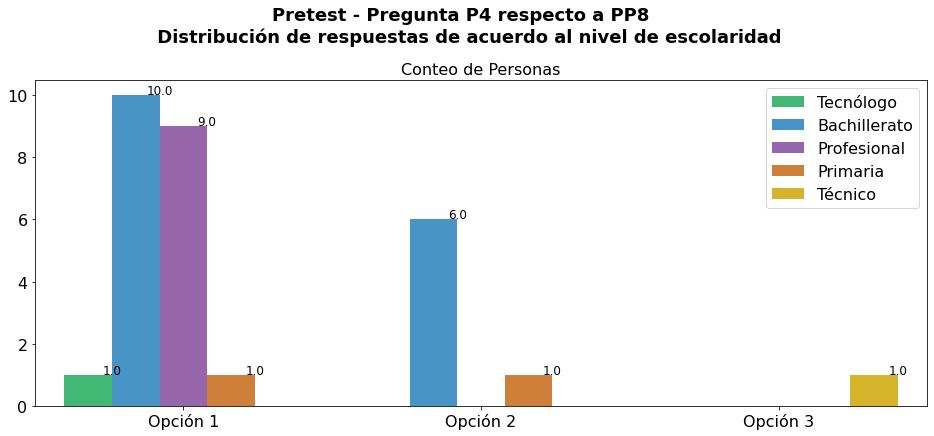

In [31]:
drawChartGenericEstrato('P4', 'PP8', 'Porcentaje de Personas', 'Conteo de Personas', 
                        (0.5, 0.5, 0.5), 'Distribución de respuestas de acuerdo al nivel de escolaridad', 
                        16, 6, 14, 12, 18, options=['Opción 1', 'Opción 2', 'Opción 3'])

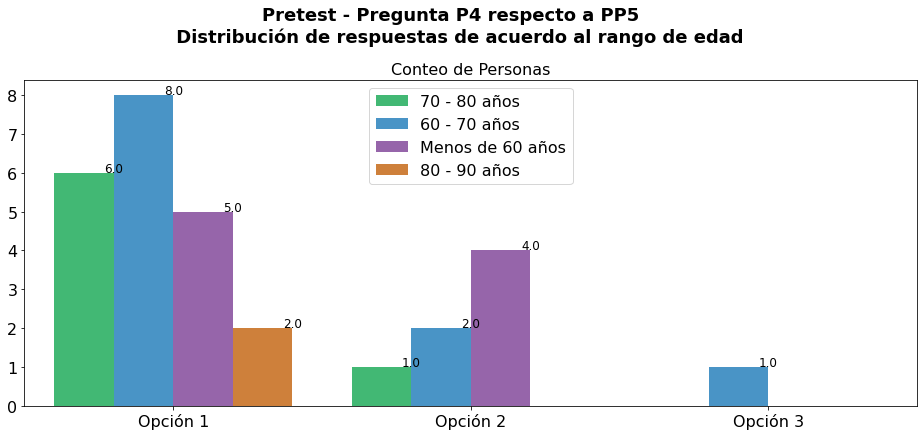

In [32]:
drawChartGenericEstrato('P4', 'PP5', 'Porcentaje de Personas', 'Conteo de Personas', 
                        (0.5, 0.5, 0.5), 'Distribución de respuestas de acuerdo al rango de edad', 
                        16, 6, 14, 12, 18, options=['Opción 1', 'Opción 2', 'Opción 3'])

#### P5. ¿Qué es una carpeta?
Opciones
1. Es un icono amarillo
2. Es el contenedor de archivos, e incluso el contenedor de mismas carpetas. (***Opción correcta***)
3. Es un cuaderno donde se guarda informacion

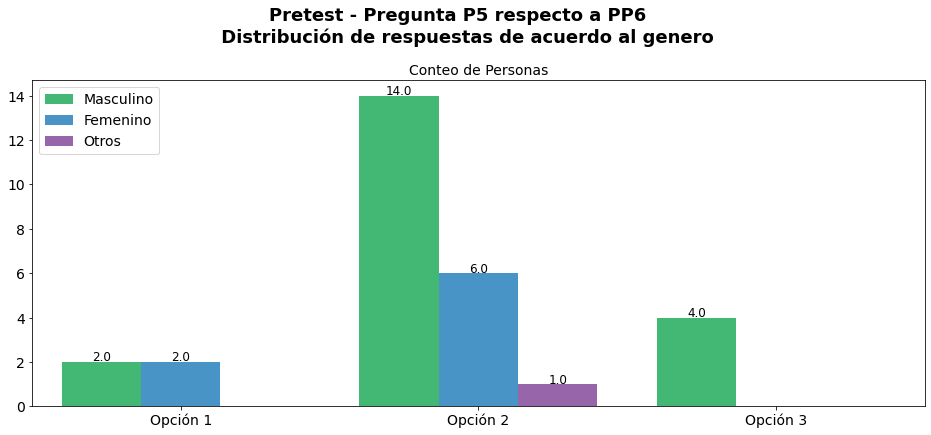

In [33]:
drawChartGeneric('P5','PP6', 'Porcentaje de Personas','Conteo de Personas', (0.05, 0.05, 0.2),
                 'Distribución de respuestas de acuerdo al genero', 16,6,14,12,18, labels=['Masculino','Femenino','Otros'],
                 options=['Opción 1', 'Opción 2', 'Opción 3'])

# Se evidencia que no se presentaron problemas de parte de la mayoria de los encuestados.
# La mayoria de las personas contestaron de forma correcta.

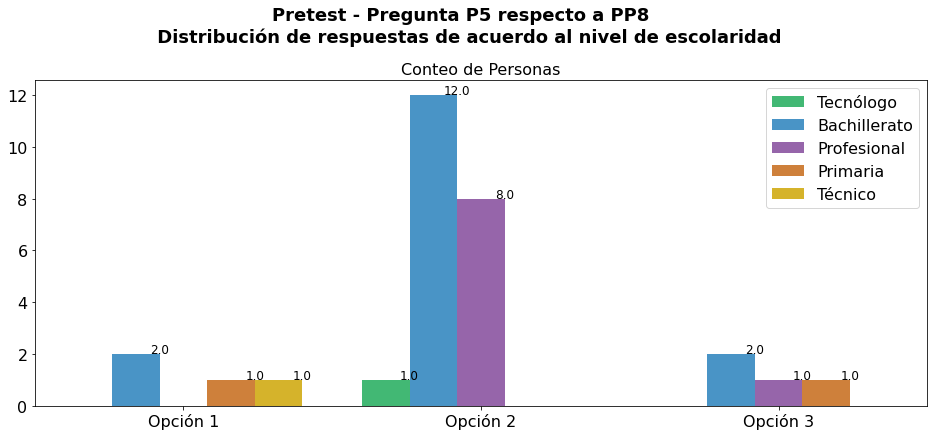

In [34]:
drawChartGenericEstrato('P5', 'PP8', 'Porcentaje de Personas', 'Conteo de Personas', 
                        (0.5, 0.5, 0.5), 'Distribución de respuestas de acuerdo al nivel de escolaridad', 
                        16, 6, 14, 12, 18, options=['Opción 1', 'Opción 2', 'Opción 3'])

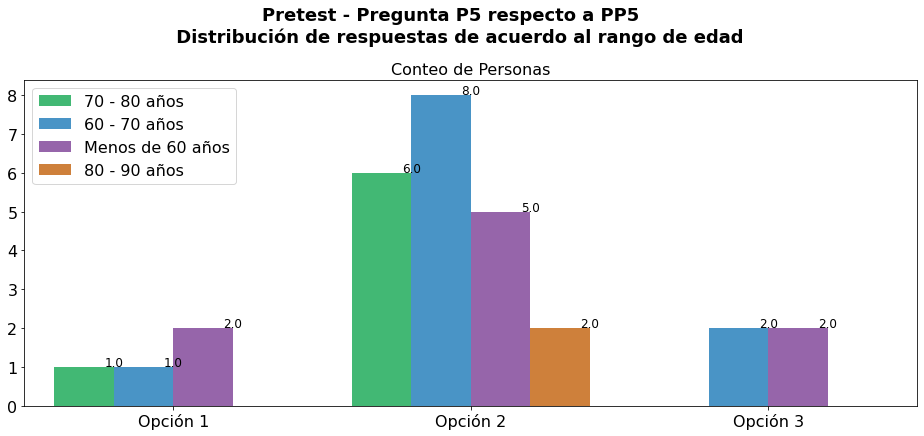

In [35]:
drawChartGenericEstrato('P5', 'PP5', 'Porcentaje de Personas', 'Conteo de Personas', 
                        (0.5, 0.5, 0.5), 'Distribución de respuestas de acuerdo al rango de edad', 
                        16, 6, 14, 12, 18, options=['Opción 1', 'Opción 2', 'Opción 3'])

#### P6. ¿Qué es Nequi?
Opciones
1. Es una aplicación que permite manejar el dinero. (***Opción correcta***)
2. Es una aplicación de pago para ver series y vídeos.
3. Es una aplicación que ofrece servicios de entretenimiento.

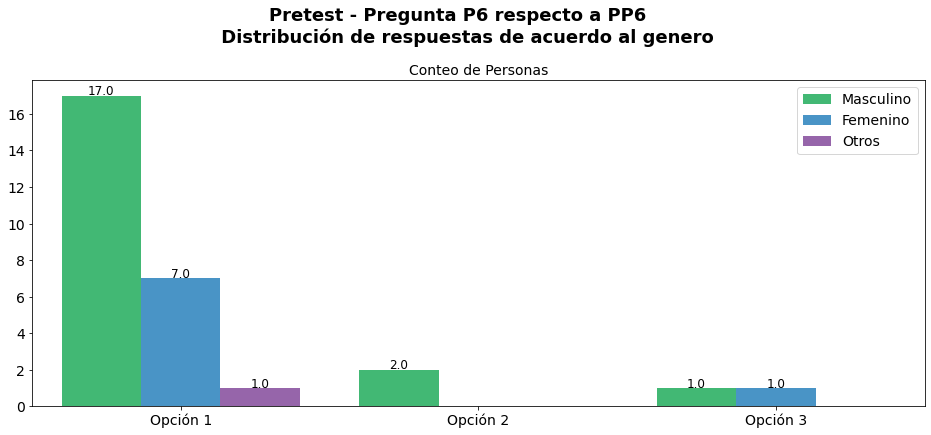

In [36]:
drawChartGeneric('P6','PP6', 'Porcentaje de Personas','Conteo de Personas', (0.05, 0.05, 0.2),
                 'Distribución de respuestas de acuerdo al genero', 16,6,14,12,18, labels=['Masculino','Femenino','Otros'],
                 options=['Opción 1', 'Opción 2', 'Opción 3'])

# Se evidencia que no se presentaron problemas de parte de la mayoria de los encuestados.
# La mayoria de las personas contestaron de forma correcta.

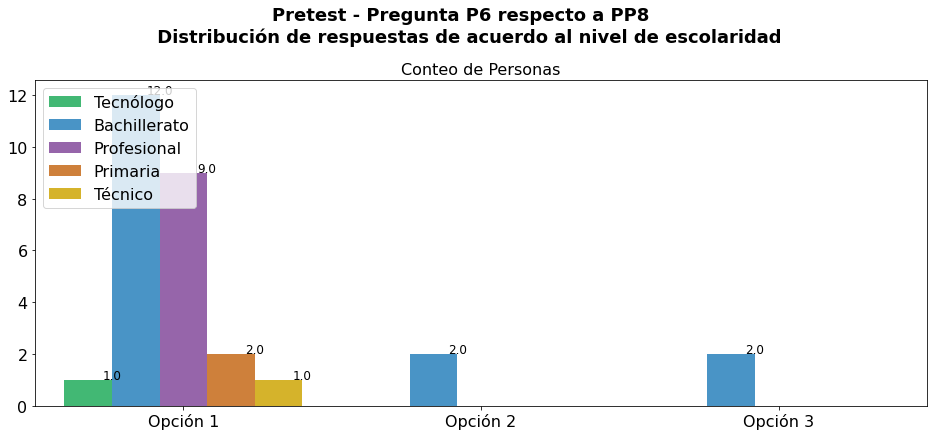

In [37]:
drawChartGenericEstrato('P6', 'PP8', 'Porcentaje de Personas', 'Conteo de Personas', 
                        (0.5, 0.5, 0.5), 'Distribución de respuestas de acuerdo al nivel de escolaridad', 
                        16, 6, 14, 12, 18, options=['Opción 1', 'Opción 2', 'Opción 3'])

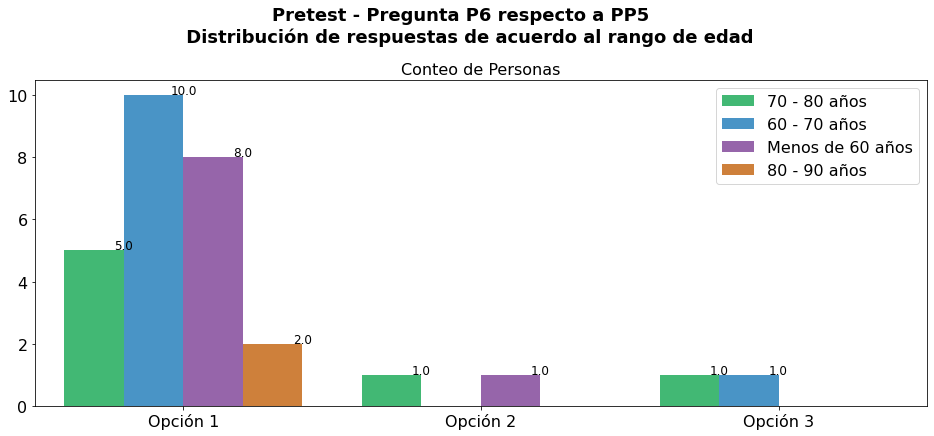

In [38]:
drawChartGenericEstrato('P6', 'PP5', 'Porcentaje de Personas', 'Conteo de Personas', 
                        (0.5, 0.5, 0.5), 'Distribución de respuestas de acuerdo al rango de edad', 
                        16, 6, 14, 12, 18, options=['Opción 1', 'Opción 2', 'Opción 3'])

#### P7. ¿Qué es Daviplata?
Opciones
1. Es una aplicación que permite manejar el dinero. (***Opción correcta***)
2. Es una aplicación para compartir imágenes.
3. Es una aplicación de pago para aplicar descuentos en tiendas virtuales.

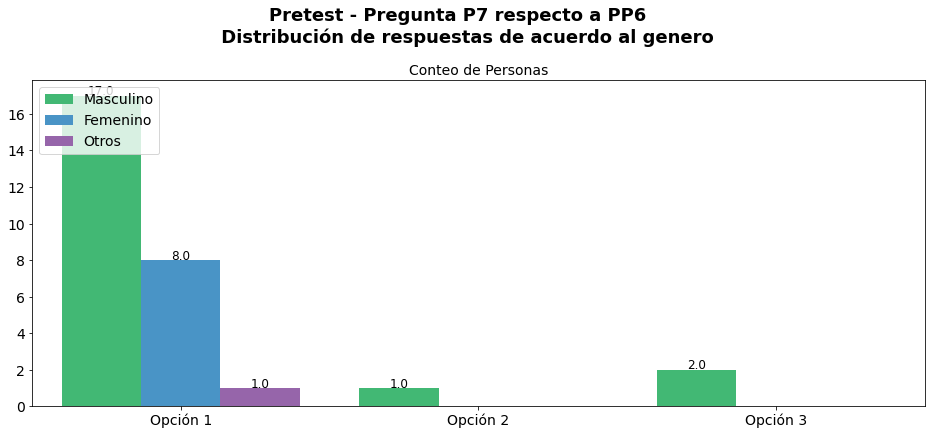

In [39]:
drawChartGeneric('P7','PP6', 'Porcentaje de Personas','Conteo de Personas', (0.05, 0.05, 0.2), 
                 'Distribución de respuestas de acuerdo al genero', 16,6,14,12,18, labels= ['Masculino','Femenino','Otros'], 
                 options=['Opción 1', 'Opción 2', 'Opción 3'])

# Se evidencia que no se presentaron problemas de parte de la mayoria de los encuestados.
# La mayoria de las personas contestaron de forma correcta.

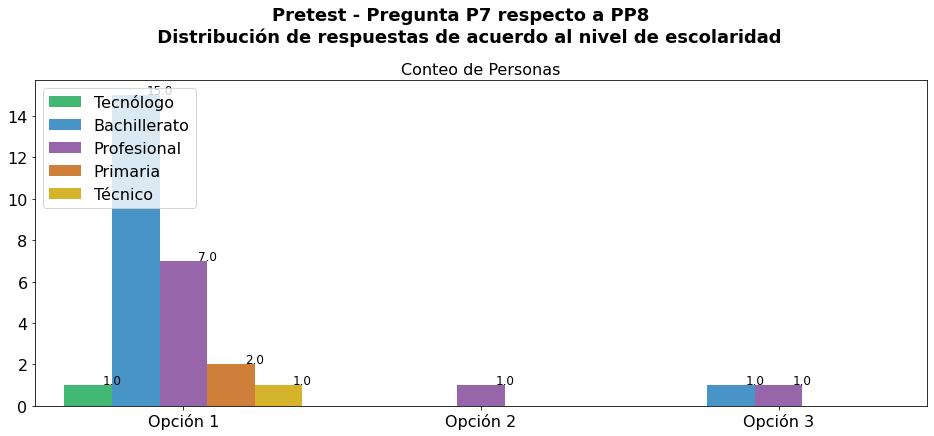

In [40]:
drawChartGenericEstrato('P7', 'PP8', 'Porcentaje de Personas', 'Conteo de Personas', 
                        (0.5, 0.5, 0.5), 'Distribución de respuestas de acuerdo al nivel de escolaridad', 
                        16, 6, 14, 12, 18, options=['Opción 1', 'Opción 2', 'Opción 3'])

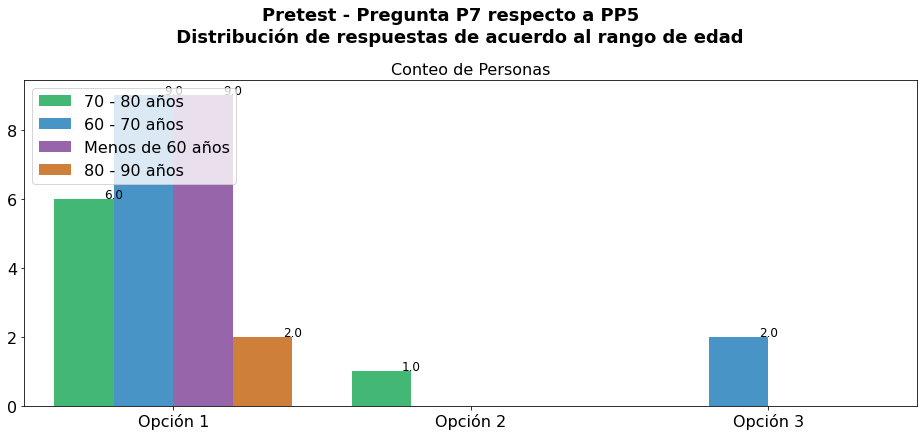

In [41]:
drawChartGenericEstrato('P7', 'PP5', 'Porcentaje de Personas', 'Conteo de Personas', 
                        (0.5, 0.5, 0.5), 'Distribución de respuestas de acuerdo al rango de edad', 
                        16, 6, 14, 12, 18, options=['Opción 1', 'Opción 2', 'Opción 3'])

#### P8. ¿Como realizar un pago por PSE?
Opciones
1. Ingresando a la página de la empresa a la que hará el pago, seleccionando los productos o servicios, luego se escoge PSE como medio de pago, indicar la entidad financiera donde tiene su cuenta bancaria y oprimir el botón de pagar. (***Opción correcta***)
2. Ingresando a la página de PSE, seleccionar los productos o servicios a cancelar, indicar cuenta bancaria y oprimir en el botón de pagar.
3. Seleccionando los productos o servicios en la pagina de PSE, indicando la entidad financiera donde tiene su cuenta bancaria y oprimir el botón de pagar.

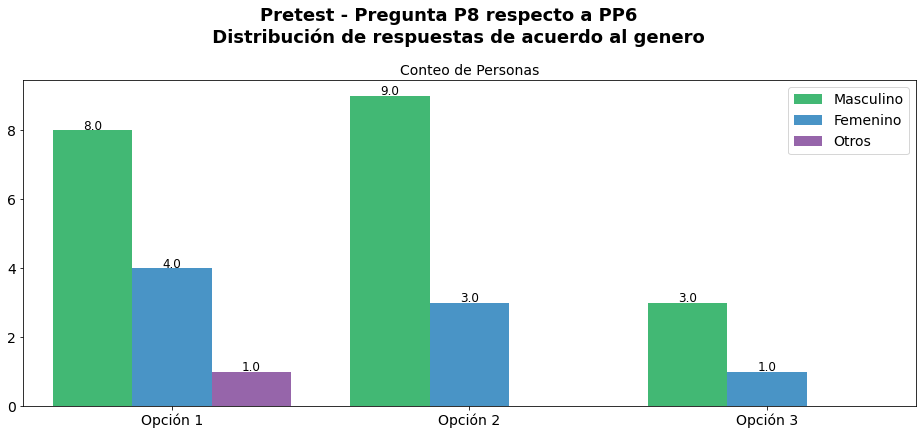

In [42]:
drawChartGeneric('P8','PP6', 'Porcentaje de Personas','Conteo de Personas', (0.05, 0.05, 0.2), 
                 'Distribución de respuestas de acuerdo al genero', 16,6,14,12,18, labels= ['Masculino','Femenino','Otros'],
                 options=['Opción 1', 'Opción 2', 'Opción 3'])

# Se evidencia que se presentaron problemas de parte de la mayoria de los encuestados.
# Tanto en hombres como en mujeres fueron más los que fallaron que las personas que acertaron en la respuesta.

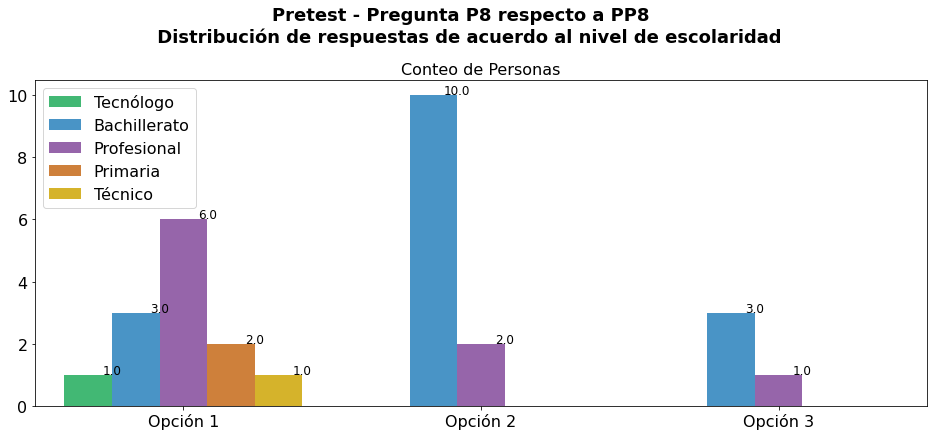

In [43]:
drawChartGenericEstrato('P8', 'PP8', 'Porcentaje de Personas', 'Conteo de Personas', 
                        (0.5, 0.5, 0.5), 'Distribución de respuestas de acuerdo al nivel de escolaridad', 
                        16, 6, 14, 12, 18, options=['Opción 1', 'Opción 2', 'Opción 3'])

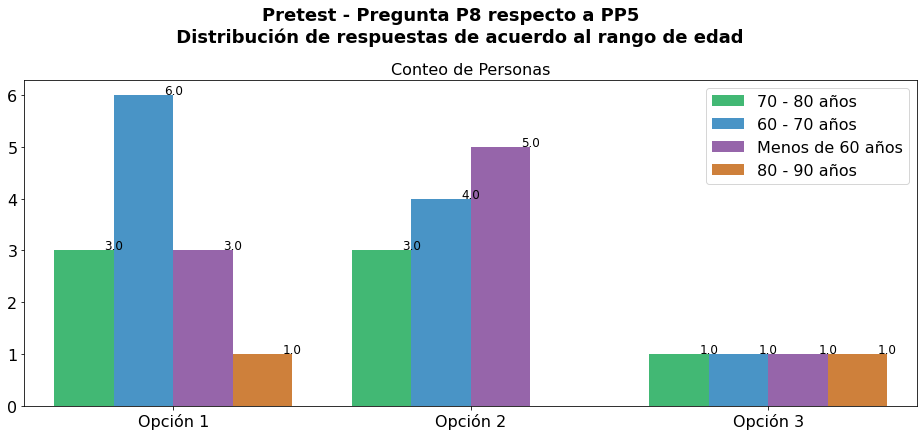

In [44]:
drawChartGenericEstrato('P8', 'PP5', 'Porcentaje de Personas', 'Conteo de Personas', 
                        (0.5, 0.5, 0.5), 'Distribución de respuestas de acuerdo al rango de edad', 
                        16, 6, 14, 12, 18, options=['Opción 1', 'Opción 2', 'Opción 3'])

#### P9. ¿Como realizar una vídeo llamada hacia un contacto en WhatsApp?

Opciones
1. Ingresar al chat del contacto y en la parte superior oprimir el icono con apariencia de cámara. (***Opción correcta***)
2. Ingresar al chat del contacto y en la parte superior oprimir el icono con apariencia de telefono.
3. Ingresar al chat del contacto y en la parte superior oprimir los tres puntos.


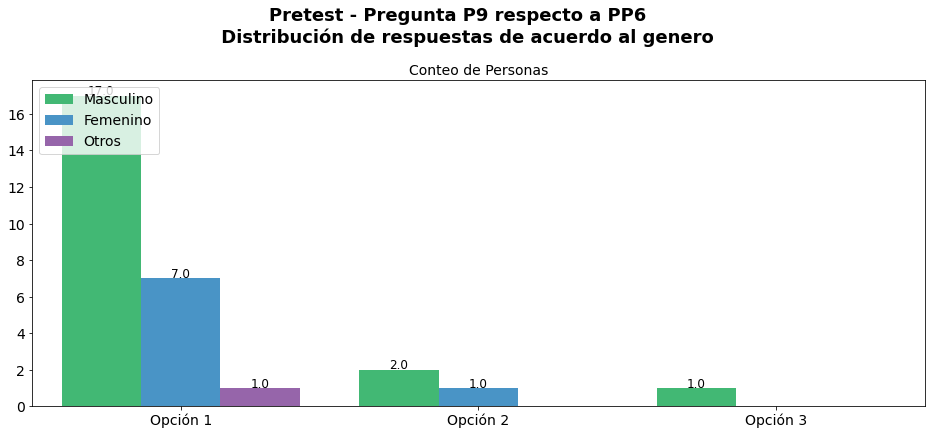

In [45]:
drawChartGeneric('P9','PP6', 'Porcentaje de Personas','Conteo de Personas', (0.05, 0.05, 0.2), 
                 'Distribución de respuestas de acuerdo al genero', 16,6,14,12,18, labels= ['Masculino','Femenino','Otros'],
                 options=['Opción 1', 'Opción 2', 'Opción 3'])

# Se evidencia que no se presentaron problemas de parte de la mayoria de los encuestados.
# La mayoria de las personas contestaron de forma correcta.

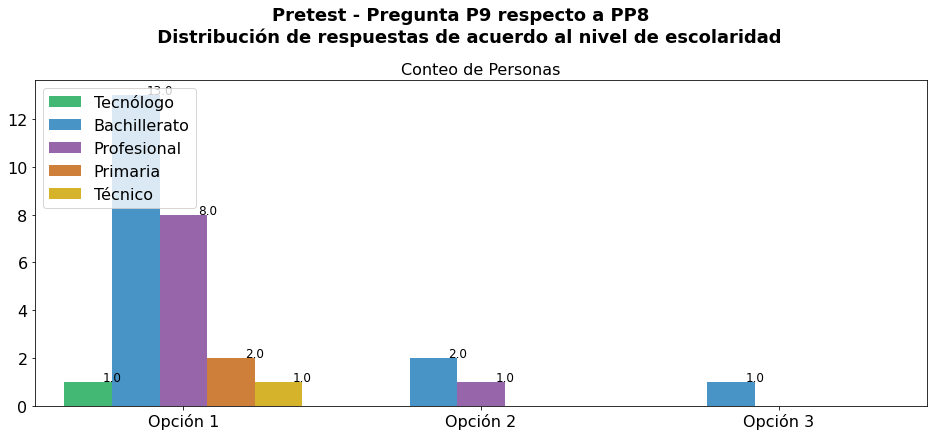

In [46]:
drawChartGenericEstrato('P9', 'PP8', 'Porcentaje de Personas', 'Conteo de Personas', 
                        (0.5, 0.5, 0.5), 'Distribución de respuestas de acuerdo al nivel de escolaridad', 
                        16, 6, 14, 12, 18, options=['Opción 1', 'Opción 2', 'Opción 3'])

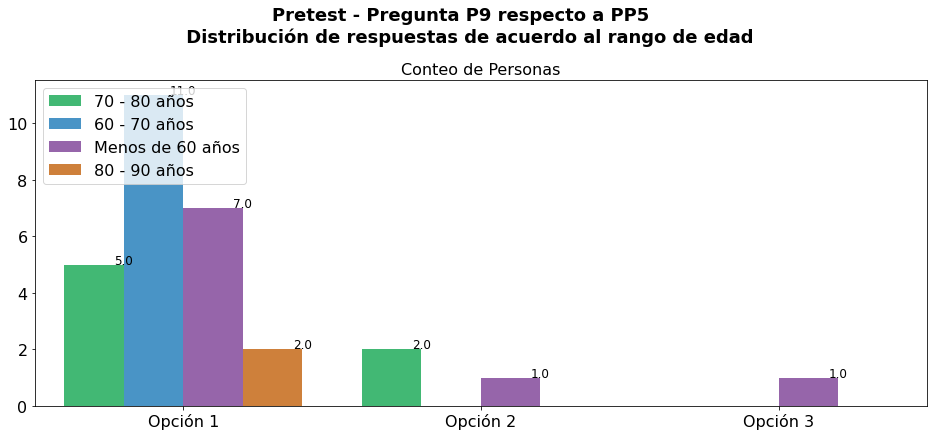

In [47]:
drawChartGenericEstrato('P9', 'PP5', 'Porcentaje de Personas', 'Conteo de Personas', 
                        (0.5, 0.5, 0.5), 'Distribución de respuestas de acuerdo al rango de edad', 
                        16, 6, 14, 12, 18, options=['Opción 1', 'Opción 2', 'Opción 3'])

####  P10. De acuerdo a las siguientes aplicaciones, ¿cuál aplicación se considera de mensajería instantánea?

Opciones
1. WhatsApp. (***Opción correcta***)
2. YouTube.
3. Google Drive.


## Normalizar la data y Correlaciones Pearson

In [48]:
#datos = datos.drop(['Puntuacion'], axis=1)

datos = datosCopy

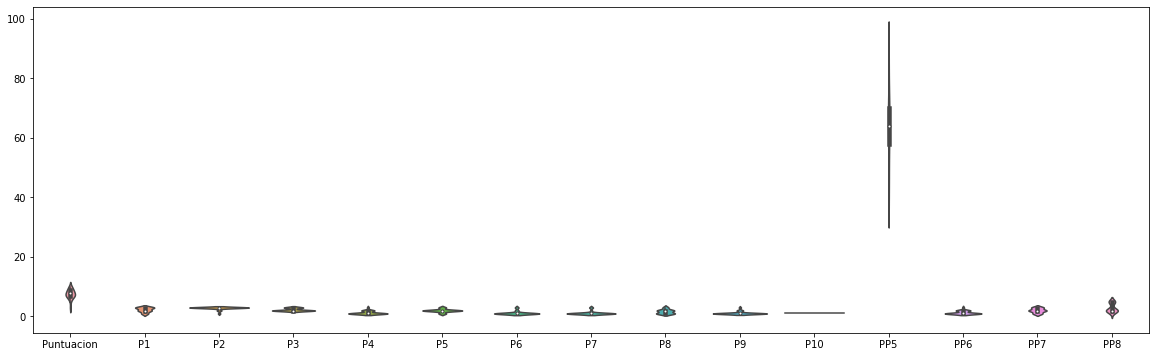

In [49]:
##Ya que las distribuciones son diferentes se procede a normalizar
plt.subplots(figsize=(20, 6))
_ = sns.violinplot(data=datos)

datosOrg = datos.copy()

In [50]:
valores = datosOrg.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(valores)

pd.DataFrame(np.vstack((scaler.data_min_, scaler.data_max_)),
             index=['Min', 'Max'],
             columns=datosOrg.columns)

normalizados = scaler.transform(valores)
df_normalizados = pd.DataFrame(normalizados,
                              index=datosOrg.index,
                              columns=datosOrg.columns)

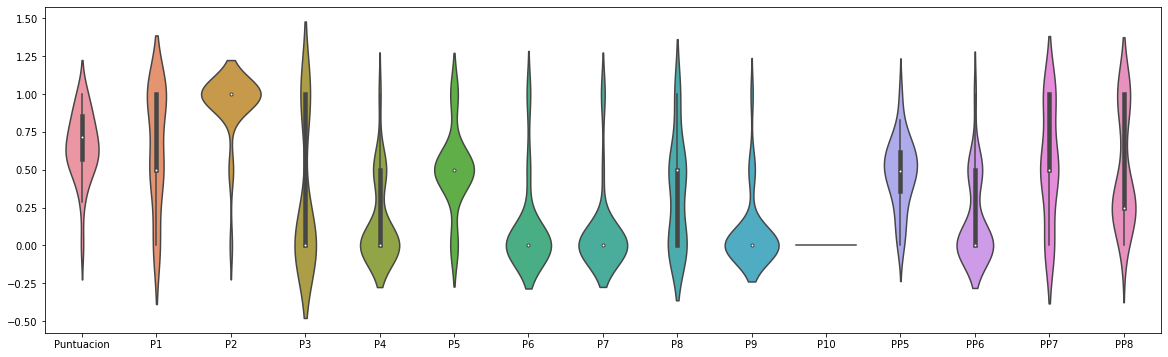

In [51]:
##Datos Normalizados
plt.subplots(figsize=(20, 6))
_ = sns.violinplot(data=df_normalizados)

In [52]:
##COrrelaciones para determinar posibles definiciones entre una a muchas variables
##p1 y pp7 correlacion de 0.52, pp7 y p3 0,44, p1 y p3, 0.41, 
corr_matrix = df_normalizados.corr(method='spearman')

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

tidy_corr_matrix(corr_matrix).head(30)

,variable_1,variable_2,r,abs_r
4,Puntuacion,P4,-0.639761,0.639761
56,P4,Puntuacion,-0.639761,0.639761
6,Puntuacion,P6,-0.535198,0.535198
84,P6,Puntuacion,-0.535198,0.535198
26,P1,PP7,0.524838,0.524838
169,PP7,P1,0.524838,0.524838
172,PP7,P4,-0.486241,0.486241
68,P4,PP7,-0.486241,0.486241
54,P3,PP7,0.440113,0.440113
171,PP7,P3,0.440113,0.440113


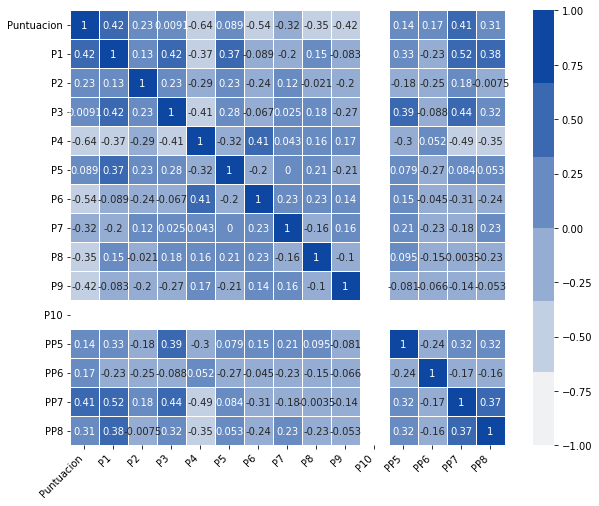

In [53]:
grafCor(corr_matrix)

In [54]:
testShapiroWilk(df_normalizados)

,Variable,Valores P,Concepto
0,Puntuacion,4.001956e-02,No es una variable Normal
1,P1,2.371479e-05,No es una variable Normal
2,P2,3.392541e-10,No es una variable Normal
3,P3,6.623421e-08,No es una variable Normal
4,P4,1.109218e-07,No es una variable Normal
5,P5,2.927796e-06,No es una variable Normal
6,P6,1.219784e-09,No es una variable Normal
7,P7,3.172659e-10,No es una variable Normal
8,P8,3.467847e-05,No es una variable Normal
9,P9,1.361172e-09,No es una variable Normal


## Análisis del Postest

In [55]:
datosPos = pd.read_csv('./postest.csv', sep=';')

datosPos.head()

,Puntuacion,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,PP5,PP6,PP7,PP8
0,8,3,3,3,1,2,1,1,3,1,1,68,1,3,3
1,8,2,3,2,1,2,1,1,2,1,1,82,1,2,1
2,8,2,3,2,1,1,1,1,1,1,1,41,1,3,2
3,9,3,3,2,1,2,1,1,1,1,3,65,1,1,1
4,9,3,3,2,1,2,1,1,2,1,1,59,1,2,2


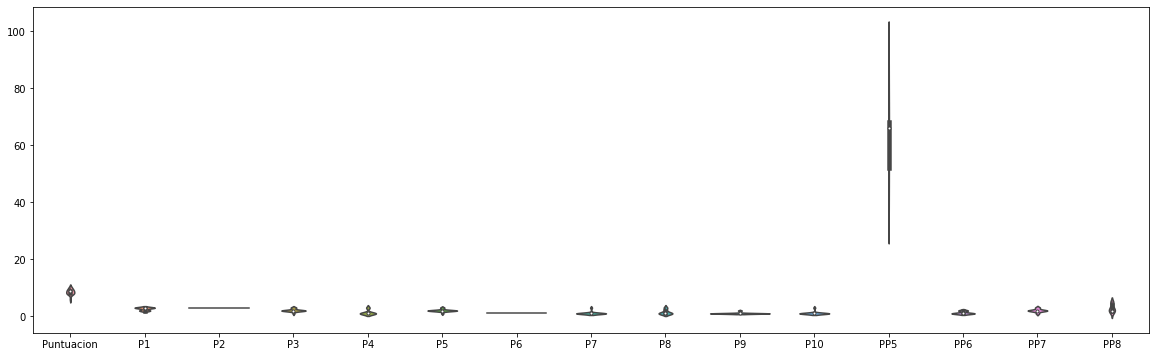

In [56]:
plt.subplots(figsize=(20, 6))
_ = sns.violinplot(data=datosPos)

In [57]:
valores = datosPos.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(valores)

pd.DataFrame(np.vstack((scaler.data_min_, scaler.data_max_)),
             index=['Min', 'Max'],
             columns=datosPos.columns)

normalizados = scaler.transform(valores)
df_normalizadosPos = pd.DataFrame(normalizados,
                              index=datosPos.index,
                              columns=datosPos.columns)

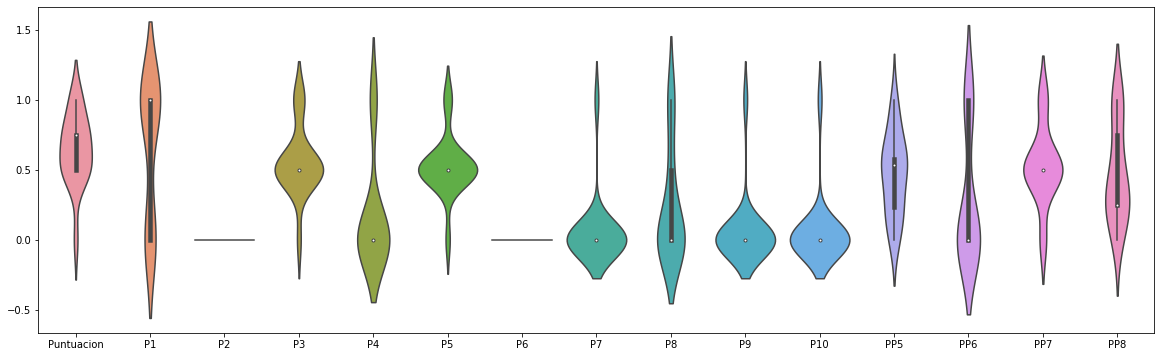

In [58]:
##Datos Normalizados
plt.subplots(figsize=(20, 6))
_ = sns.violinplot(data=df_normalizadosPos)

In [59]:
corr_matrixPos = df_normalizadosPos.corr(method='spearman')

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

tidy_corr_matrix(corr_matrixPos).head(30)

,variable_1,variable_2,r,abs_r
55,P5,P4,0.687593,0.687593
43,P4,P5,0.687593,0.687593
1,Puntuacion,P1,0.574696,0.574696
13,P1,Puntuacion,0.574696,0.574696
61,P5,PP5,0.548826,0.548826
121,PP5,P5,0.548826,0.548826
6,Puntuacion,P8,-0.528246,0.528246
78,P8,Puntuacion,-0.528246,0.528246
119,PP5,P3,0.511925,0.511925
35,P3,PP5,0.511925,0.511925


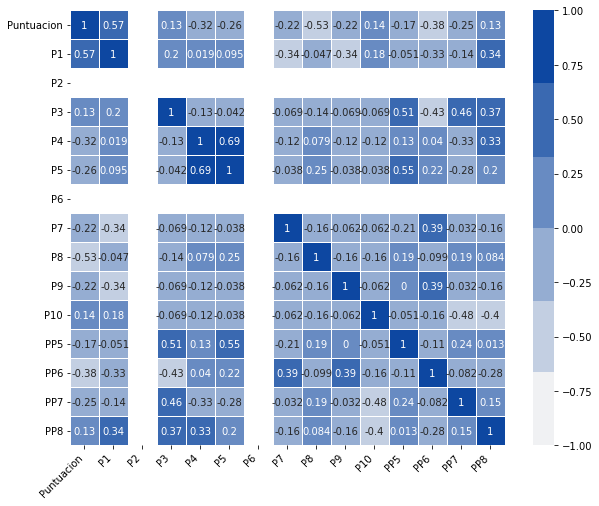

In [60]:
grafCor(corr_matrixPos)

In [61]:
testShapiroWilk(df_normalizados)

,Variable,Valores P,Concepto
0,Puntuacion,4.001956e-02,No es una variable Normal
1,P1,2.371479e-05,No es una variable Normal
2,P2,3.392541e-10,No es una variable Normal
3,P3,6.623421e-08,No es una variable Normal
4,P4,1.109218e-07,No es una variable Normal
5,P5,2.927796e-06,No es una variable Normal
6,P6,1.219784e-09,No es una variable Normal
7,P7,3.172659e-10,No es una variable Normal
8,P8,3.467847e-05,No es una variable Normal
9,P9,1.361172e-09,No es una variable Normal


## Análisis de test pareado (Pre y Pos)

In [62]:
datosPosN = datosPos
datosPreN = datos

In [63]:
datosPreN.PP6.value_counts()

1    20
2     8
3     1
Name: PP6, dtype: int64

In [64]:

##Oversampling y undersampling - nivelar el dataset con la variable que va a ser mi predictora o clasificadora
datosPosN['PP6'].value_counts()

##paso uno separar las clases - mayoritaria y minoritaria
dataFMayor = datosPosN[datosPosN.PP6==2]
dataFMenor = datosPosN[datosPosN.PP6==1]

# Over Sampling sobre la clase minoritaria
df_minoritaria = resample(dataFMenor, 
                                 replace=True,     
                                 n_samples=23,    
                                 random_state=123)
 
# Combine majority class with upsampled minority class
df_Over = pd.concat([dataFMayor, df_minoritaria])
 
# Display new class counts
df_Over.PP6.value_counts()



1    23
2     5
Name: PP6, dtype: int64

In [65]:
##Oversampling y undersampling - nivelar el dataset con la variable que va a ser mi predictora o clasificadora
df_Over['PP6'].value_counts()

##paso uno separar las clases - mayoritaria y minoritaria
dataFMayor = df_Over[df_Over.PP6==1]
dataFMenor = df_Over[df_Over.PP6==2]

# Over Sampling sobre la clase minoritaria
df_minoritaria = resample(dataFMenor, 
                                 replace=True,     
                                 n_samples=23,    
                                 random_state=123)
 
# Combine majority class with upsampled minority class
dfFinalPos = pd.concat([dataFMayor, df_minoritaria])
 
# Display new class counts
dfFinalPos.PP6.value_counts()

1    23
2    23
Name: PP6, dtype: int64

In [72]:
datosPreN.head()

datosPreN.drop(datosPreN[(datosPreN['PP6'] ==3)].index, inplace=True)

datosPreN.PP6.value_counts()

1    20
2     8
Name: PP6, dtype: int64

In [73]:
##Oversampling y undersampling - nivelar el dataset con la variable que va a ser mi predictora o clasificadora
datosPreN['PP6'].value_counts()

##paso uno separar las clases - mayoritaria y minoritaria
dataFMayor = datosPreN[datosPreN.PP6==1]
dataFMenor = datosPreN[datosPreN.PP6==2]

# Over Sampling sobre la clase minoritaria
df_minoritaria = resample(dataFMenor, 
                                 replace=True,     
                                 n_samples=23,    
                                 random_state=123)
 
# Combine majority class with upsampled minority class
dfFinalPre = pd.concat([dataFMayor, df_minoritaria])
 
# Display new class counts
dfFinalPre.PP6.value_counts()

2    23
1    20
Name: PP6, dtype: int64

In [75]:
##Oversampling y undersampling - nivelar el dataset con la variable que va a ser mi predictora o clasificadora
dfFinalPre['PP6'].value_counts()

##paso uno separar las clases - mayoritaria y minoritaria
dataFMayor = dfFinalPre[dfFinalPre.PP6==2]
dataFMenor = dfFinalPre[dfFinalPre.PP6==1]

# Over Sampling sobre la clase minoritaria
df_minoritaria = resample(dataFMenor, 
                                 replace=True,     
                                 n_samples=23,    
                                 random_state=123)
 
# Combine majority class with upsampled minority class
dfFinalPre = pd.concat([dataFMayor, df_minoritaria])
 
# Display new class counts
dfFinalPre.PP6.value_counts()

2    23
1    23
Name: PP6, dtype: int64

In [81]:
##Normalizar la data pre y post 
puntupos = dfFinalPos['Puntuacion']
puntupre = dfFinalPre['Puntuacion']

dfPosN = normaData(dfFinalPos)
dfPreN = normaData(dfFinalPre)

In [85]:
##Correlaciones pre y pos
tidy_corr_matrix(dfPosN.corr(method='spearman'))

,variable_1,variable_2,r,abs_r
43,P4,P5,0.746764,0.746764
55,P5,P4,0.746764,0.746764
25,P1,PP8,0.557335,0.557335
157,PP8,P1,0.557335,0.557335
35,P3,PP5,0.515944,0.515944
...,...,...,...,...
108,P10,P5,-0.027464,0.027464
30,P3,P5,-0.019527,0.019527
54,P5,P3,-0.019527,0.019527
24,P1,PP7,0.013663,0.013663


In [86]:
tidy_corr_matrix(dfPreN.corr(method='spearman'))

,variable_1,variable_2,r,abs_r
109,P9,P5,-0.902574,0.902574
73,P5,P9,-0.902574,0.902574
127,PP5,PP6,0.895835,0.895835
139,PP6,PP5,0.895835,0.895835
5,Puntuacion,P5,0.841632,0.841632
...,...,...,...,...
167,PP8,PP7,0.034088,0.034088
34,P2,P9,0.010580,0.010580
106,P9,P2,0.010580,0.010580
19,P1,P6,-0.009353,0.009353


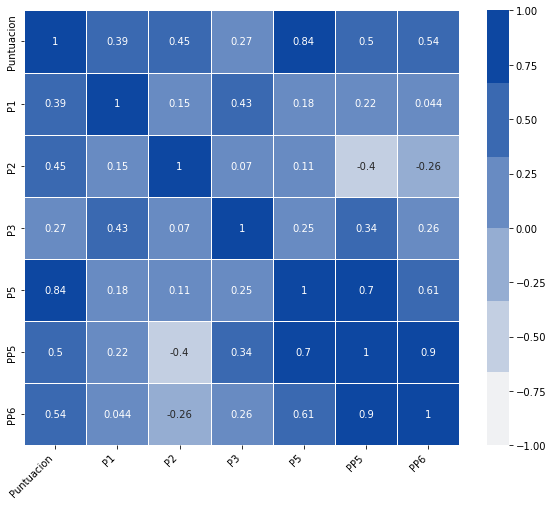

In [93]:
##Gráfica de correlacion - PRE Y POST
##Eliminando variables sin correlacion o correlación nula(p7,P10,P4,P6,P8,P9,PP7,PP8)

dfPreN = dfPreN.drop(['P7','P10','P4','P6','P8','P9','PP7','PP8'],axis=1)
grafCor(dfPreN.corr(method='spearman'))

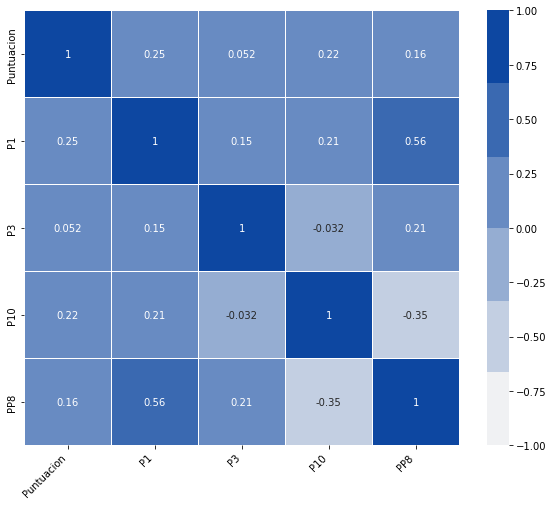

In [98]:
dfPosN = dfPosN.drop(['P4','P5','P7','P8','P9','PP5','PP6','PP7','P2','P6'],axis=1)
grafCor(dfPosN.corr(method='spearman'))

In [107]:
dfFinalPre = dfFinalPre.reset_index()
dfFinalPos = dfFinalPos.reset_index()

In [109]:
##crear el dataframe con los valores de notafinal del pretest y postest
"""
La prueba t pareada/dependiente examina si existe una diferencia estadísticamente significativa 
entre las medias de la población subyacente de dos mediciones dependientes.

Para ilustrar, las mediciones se toman del mismo sujeto/objeto, por lo que son dependientes. 
En otras palabras, una medida proporciona información sobre otra, por lo que podemos inferir los datos basándonos en una medida.
"""
dataTest = pd.concat([dfFinalPre['Puntuacion'], dfFinalPos['Puntuacion']], axis=1)

dataTest = camEncab(dataTest, ['PuntuacionPre','PuntuacionPost'])

resultados = stats.ttest_rel(dataTest['PuntuacionPre'], dataTest['PuntuacionPost'])

resultados



Ttest_relResult(statistic=-2.916868882347894, pvalue=0.005498136061139058)

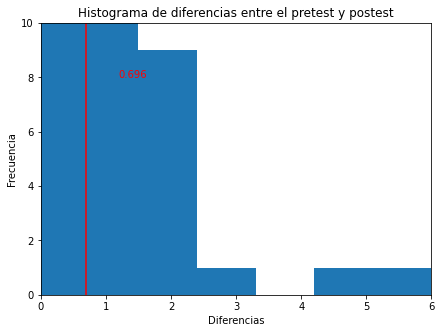

In [116]:
#El valor de p es menor a cero lo cual se rechaza la hipótesis nula la cual era que no existe diferencia entre los dos momentos 
# y se adopta la hipótesis alternativa asumiendo que existe diferencia entre las medias del pretest y postest, lo cual indica un crecimiento
#como se evidencia en la siguiente gráfica, en unidades sería 0.696 más en promedio que las notas iniciales del pretest.
#
# Generate difference data
diferencias = dataTest['PuntuacionPost'] - dataTest['PuntuacionPre']

# Inspect difference data 
# Histogram +  Mean
fig = plt.figure(figsize=(7,5))   
plt.hist(diferencias, bins=10) 
plt.axvline(x=np.mean(diferencias), c ='r')
plt.text(np.mean(diferencias)+0.5, 8, round(np.mean(diferencias),3), c='r')
plt.xlim(0, 6)
plt.ylim(0, 10)
plt.title('Histograma de diferencias entre el pretest y postest')
plt.xlabel("Diferencias")
plt.ylabel("Frecuencia")
plt.show()

In [125]:

X = dfPreN.drop('Puntuacion', axis=1) 
y = dfPreN.Puntuacion 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=200)

reg = LinearRegression() 
start = datetime.now()
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
stop = datetime.now()
delta = stop - start

print('Linear Regression\n')
r2 = r2_score(y_test, pred)
print('R2: ', r2)
err = np.sqrt(mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', err)
seconds = delta.seconds + delta.microseconds/1E6
print('Time to compute: ', seconds, 'seconds')

linear_reg = ('Linear Regression', r2, err, seconds)



Linear Regression

R2:  0.9856561231730541
Root Mean Squared Error:  0.03254267291251938
Time to compute:  0.004703 seconds


In [126]:
svr = SVR(C=100, gamma=1, kernel='linear')
start = datetime.now()
svr.fit(X_train, y_train)
pred = svr.predict(X_test)
stop = datetime.now()
delta = stop - start

print('-'*30)
r2 = r2_score(y_test, pred)
print('R2: ', r2)
err = np.sqrt(mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', err)
seconds = delta.seconds + delta.microseconds/1E6
print('Time to compute: ', seconds, 'seconds')

support_vector_reg = ('SVR', r2, err, seconds)

------------------------------
R2:  0.7968990185675606
Root Mean Squared Error:  0.12245484093697415
Time to compute:  0.002339 seconds


In [132]:
params = {
    'n_neighbors': [4],  #'n_neighbors': [3,4,5,6,7,8,9,10,11,12], Number of neighbor points to consider for prediction
    'weights': ['distance'],  #'weights': ['uniform', 'distance'], weight function used in prediction
    'p': [2]  #'p': [1,2] # p=1 compute manhattan distance, p=2 compute euclidean distance
    }

knn = KNeighborsRegressor()
rs = GridSearchCV(estimator=knn, param_grid=params, cv=9, n_jobs=-1, scoring='neg_mean_squared_error')
rs.fit(X_train, y_train)
print(rs.best_estimator_)
knn = rs.best_estimator_
start = datetime.now()
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
stop = datetime.now()
delta = stop - start

print('-'*30)
r2 = r2_score(y_test, pred)
print('R2: ', r2)
err = np.sqrt(mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', err)
seconds = delta.seconds + delta.microseconds/1E6
print('Time to compute: ', seconds, 'seconds')

knn_reg = ('KNN', r2, err, seconds)


KNeighborsRegressor(n_neighbors=4, weights='distance')
------------------------------
R2:  0.4848398696181867
Root Mean Squared Error:  0.1950253516831102
Time to compute:  0.003943 seconds


In [133]:
df_results = pd.DataFrame([linear_reg, knn_reg, support_vector_reg], columns=['model', 'R2','RMSE','comp_time'])
df_results.sort_values('R2',ascending=False)

,model,R2,RMSE,comp_time
0,Linear Regression,0.985656,0.032543,0.004703
2,SVR,0.796899,0.122455,0.002339
1,KNN,0.484840,0.195025,0.003943
